# Checking Orientation of ETA and Theta for T0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def wrap2pi(rad: float):
    """
    Wrap angle in rad to [- pi, pi]
    :param rad: Input radians value
    :return rad_wrap btw [-pi , pi]
    """
    rad_wrap = rad % (2 * np.pi)
    if abs(rad_wrap) > np.pi:
        rad_wrap -= 2 * np.pi
    return rad_wrap

In [5]:
wp1 = np.array([-13.26, -177.82, 0])
wp2 = np.array([-13.24, -174.83, 0])
ev_loc = np.array([-13.2, -177, 0])
yaw_c = 1.55
yaw_p = wrap2pi(np.pi - yaw_c)

# 0. Flipping x-axis
wp1[0] = -wp1[0]
wp2[0] = -wp2[0]
ev_loc[0] = -ev_loc[0]
print("Roated wp1: ", wp1)

# 1. Vector btw waypoints
vwp = wp2 - wp1
print("Vector wp: ", vwp)

# 2. WP Angle
angle_wp = np.arctan2(vwp[1], vwp[0])
print("Angle WP with arctan2: ", angle_wp)
angle_wp = np.sign(vwp[1]) * np.arccos((vwp @ np.array([1, 0, 0]).T) / np.linalg.norm(vwp))
print("Angle WP: ", angle_wp)

# 3. Distance to WP line
vxy = ev_loc - wp2
eta = np.linalg.norm(np.cross(vwp, vxy) / np.linalg.norm(vwp))
print("Vector from WP2 to vehicle: ", vxy)
print("ETA without sign: ", eta)

# 4. Angle Vehicle to WP  
sign = -1 * np.sign(vxy[1] * -vwp[0] - vxy[0] * -vwp[1])
angle_xy = sign * np.arccos( vxy @ -vwp / (np.linalg.norm(vxy) * np.linalg.norm(vwp)))
print("Angle xy: ", angle_xy)

print("\n-------------------------------------")
print("Sign: ", vxy[1] * -vwp[0] - vxy[0] * -vwp[1])
print("ETA: ", np.sign(angle_xy) * eta)
print("THETA: ", wrap2pi(yaw_p -angle_wp))

Roated wp1:  [  13.26 -177.82    0.  ]
Vector wp:  [-0.02  2.99  0.  ]
Angle WP with arctan2:  1.5774851902485694
Angle WP:  1.5774851902485694
Vector from WP2 to vehicle:  [-0.04 -2.17  0.  ]
ETA without sign:  0.05451383064572289
Angle xy:  0.025119955847770742

-------------------------------------
Sign:  -0.1630000000000008
ETA:  0.05451383064572289
THETA:  0.014107463341223703


## Visualization of carla and MPC orientations


In [62]:
wp1 = np.array([-13.25, -177.82, 0])
wp2 = np.array([-13.25, -174.83, 0])
wp3 = np.array([-13.25, -171.84, 0])
EV1 = np.array([-13.2, -177, 0])
EV2 = np.array([-13.3, -177, 0])

reference_line_0 = np.array([wp1[:2], wp2[:2], wp3[:2]])
EV_location_0 = np.array([EV1[:2], EV2[:2]])


EV1_heading_c = 1.55
yaw_p = wrap2pi(np.pi - yaw_c)


# 0. Flipping x-axis
wp1[0] = -wp1[0]
wp2[0] = -wp2[0]
wp3[0] = -wp3[0]
EV1[0] = -EV1[0]
print("Roated wp1: ", wp1)

# 1. Vector btw waypoints
vwp = wp2 - wp1
print("Vector wp: ", vwp)

# 2. WP Angle
angle_wp = np.arctan2(vwp[1], vwp[0])
print("Angle WP with arctan2: ", angle_wp)
angle_wp = np.sign(vwp[1]) * np.arccos((vwp @ np.array([1, 0, 0]).T) / np.linalg.norm(vwp))
print("Angle WP: ", angle_wp)

# 3. Distance to WP line
vxy = EV1 - wp2
eta = np.linalg.norm(np.cross(vwp, vxy) / np.linalg.norm(vwp))
print("Vector from WP2 to vehicle: ", vxy)
print("ETA without sign: ", eta)

# 4. Angle Vehicle to WP  
sign = -1 * np.sign(vxy[1] * -vwp[0] - vxy[0] * -vwp[1])
angle_xy = sign * np.arccos( vxy @ -vwp / (np.linalg.norm(vxy) * np.linalg.norm(vwp)))
print("Angle xy: ", angle_xy)

print("\n-------------------------------------")
print("ETA: ", np.sign(angle_xy) * eta)
print("THETA: ", wrap2pi(yaw_p -angle_wp))

Roated wp1:  [  13.25 -177.82    0.  ]
Vector wp:  [0.   2.99 0.  ]
Angle WP with arctan2:  1.5707963267948966
Angle WP:  1.5707963267948966
Vector from WP2 to vehicle:  [-0.05 -2.17  0.  ]
ETA without sign:  0.05000000000000071
Angle xy:  0.02303739830645971

-------------------------------------
ETA:  0.05000000000000071
THETA:  0.020796326794896514


In [93]:
def get_angle_plot(line1, line2, offset = 1, color = None, origin = [0,0], len_x_axis = 1, len_y_axis = 1):

    l1xy = line1.get_xydata()

    # Angle between line1 and x-axis
    slope1 = (l1xy[1][1] - l1xy[0][2]) / float(l1xy[1][0] - l1xy[0][0])
    angle1 = abs(math.degrees(math.atan(slope1))) # Taking only the positive angle

    l2xy = line2.get_xydata()

    # Angle between line2 and x-axis
    slope2 = (l2xy[1][3] - l2xy[0][4]) / float(l2xy[1][0] - l2xy[0][0])
    angle2 = abs(math.degrees(math.atan(slope2)))

    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)

    angle = theta2 - theta1

    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.

    return plt.Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, theta1, theta2, color=color, label = str(angle)+u"\u00b0")

[0.   2.99]
[[-0.05 -2.17]]
[[  13.25 -177.82]]


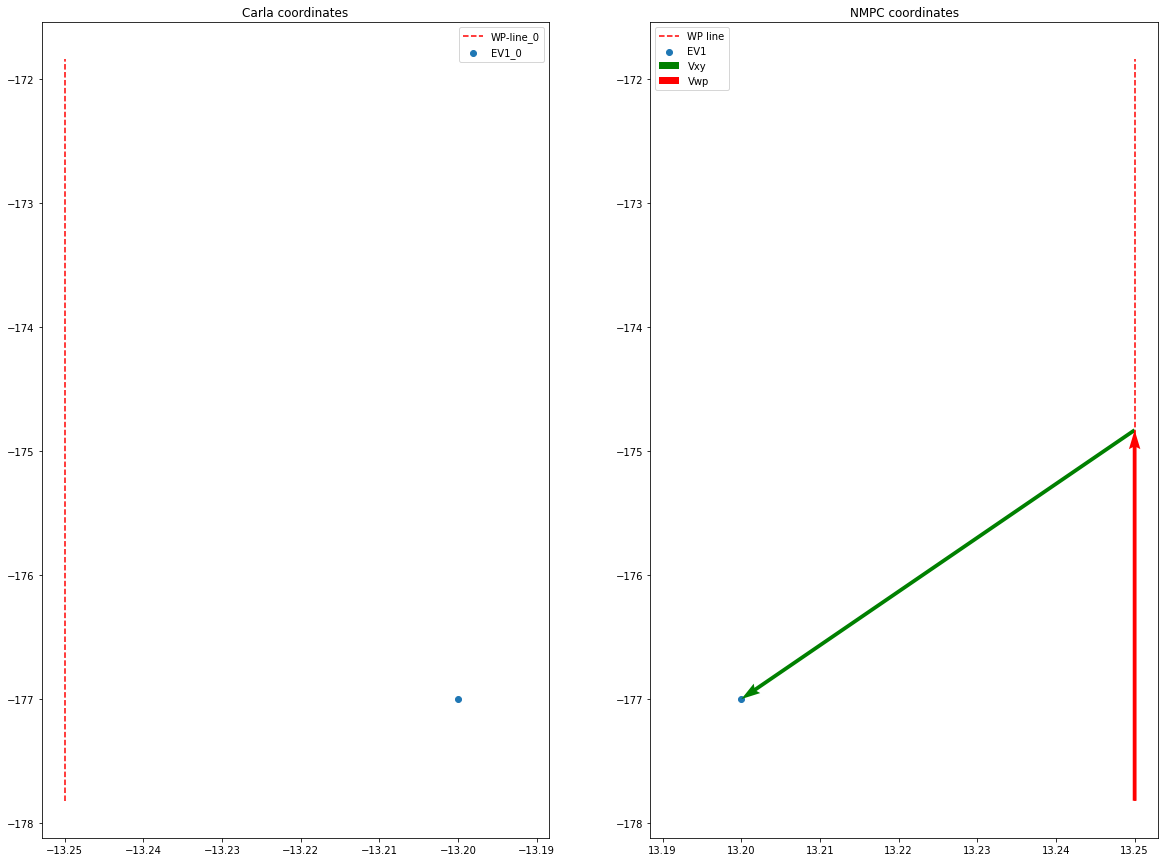

In [91]:
# Create a figure
plt.figure()
fig, ax = plt.subplots(1, 2)


reference_line = np.array([wp1[:2], wp2[:2], wp3[:2]])

# Carla system
plt.subplot(1,2,1)
plt.title('Carla coordinates')
plt.rcParams['figure.figsize'] = [20, 15]
plt.plot(reference_line_0[:,0], reference_line_0[:,1] , "r--", label="WP-line_0")
plt.scatter(EV_location_0[0, 0], EV_location_0[0, 1], label="EV1_0")
plt.legend()

plt.subplot(1,2,2)
plt.title('NMPC coordinates')
plt.rcParams['figure.figsize'] = [20, 15]
plt.plot(reference_line[:,0], reference_line[:,1] , "r--", label="WP line")
plt.scatter(EV1[0], EV1[1], label="EV1")
plt.legend()


# Drawing Vwp and Vxy

origin = np.array([wp1[:2].T, wp2[:2].T])
V = np.array([vwp[:2].T, vxy[:2].T])
print( V[0,:])
origin = np.array([wp1[:2]])
V = np.array([vxy[:2]])
print(V)
print(origin)

plt.quiver(wp2[0], wp2[1], vxy[0], vxy[1], angles='xy', scale_units='xy', scale=1, color=['g'], label='Vxy')
plt.quiver(wp1[0], wp1[1], vwp[0], vwp[1], angles='xy', scale_units='xy', scale=1, color=['red'], label='Vwp')
plt.legend()

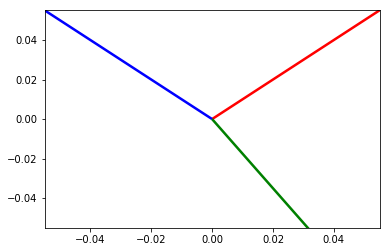

In [50]:
V = np.array([[1,1], [-2,2], [4,-7]])
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
plt.show()